# Weather Data Analysis Project - Programming for Data Analytics

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Project Outline

### Minimum project
 - Read in a number of good data sets

 - Analyse the data using various techniques (from what we've learned in the module)

 - Nice-looking plots to illustrate my findings

 - *For more marks, add:* Increased range of data, scikitlearn and other packages, meaningful insights, increase complexity of plots but keep readability

### Questions I can answer:
 - How much wind power is there at a particular location?

 - This is quite open ended, is this just the mean wind speed for
an hour/day/month/year, or should you take into account that
there are wind ranges that the windfarms can operate in. (min
max speeds)

 - Some analysis of what power when would be useful (time of
day/year)

 - Are the wind speeds likely to be the same in 10 years in the future? ie
is there a trend in recorded wind speeds over the last few decades.

 - Is there any other weather metric worth analyzing (eg rain, temp)

 - What will the power output of the windfarms in Ireland be like next
week, according to the weather forecasts? (ok that is a tricky one,
because you would need to get, or make up, information about the
size and locations of the wind farms in Ireland, one find/makeup the
windspeed to power output equation.

 - Anything else you can think of?

I sourced my dataset from Met Éireann [https://www.met.ie/climate/available-data/historical-data]

I saved the dataset as `shannon.csv` - this CSV file gives the hourly weather data in Shannon Airport from 1945 to 2025.

In [55]:
# Filename & Data Directory
filename = "shannon_data.csv"
datadir = r"C:\Users\ZMH\OneDrive\Desktop\PFDA\pfda-project\\" # still can't get "../../data" working
fullpath = datadir + filename

# Read in CSV file
df = pd.read_csv(fullpath, skiprows=23)

df.head()

C:\Users\ZMH\AppData\Local\Temp\ipykernel_24272\4267985318.py:7: DtypeWarning: Columns (6,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(fullpath, skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,01-sep-1945 01:00,0,0.1,0,15.3,0,14.6,14.4,16.0,92,...,1,17,1,90,50,6,0.0,7000,16,8
1,01-sep-1945 02:00,2,0.0,0,15.0,0,14.6,14.4,16.4,95,...,1,17,1,90,51,5,0.0,7000,9,8
2,01-sep-1945 03:00,0,0.1,0,15.0,0,14.6,14.4,16.4,95,...,1,17,1,100,51,6,0.0,7000,9,8
3,01-sep-1945 04:00,2,0.0,0,15.0,0,14.4,13.8,16.0,94,...,1,14,1,90,20,5,0.0,7000,9,8
4,01-sep-1945 05:00,0,0.0,0,15.0,0,14.5,14.4,16.1,95,...,1,16,1,110,2,2,0.0,10000,17,7


First I must clean the dataset

In [56]:
# Remove empty strings and convert to numeric
df['wdsp'] = pd.to_numeric(df['wdsp'].astype(str).str.strip(), errors='coerce')

# Drop rows where wdsp couldn't be converted
df = df.dropna(subset=['wdsp'])
df.head()

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,01-sep-1945 01:00,0,0.1,0,15.3,0,14.6,14.4,16.0,92,...,1,17.0,1,90,50,6,0.0,7000,16,8
1,01-sep-1945 02:00,2,0.0,0,15.0,0,14.6,14.4,16.4,95,...,1,17.0,1,90,51,5,0.0,7000,9,8
2,01-sep-1945 03:00,0,0.1,0,15.0,0,14.6,14.4,16.4,95,...,1,17.0,1,100,51,6,0.0,7000,9,8
3,01-sep-1945 04:00,2,0.0,0,15.0,0,14.4,13.8,16.0,94,...,1,14.0,1,90,20,5,0.0,7000,9,8
4,01-sep-1945 05:00,0,0.0,0,15.0,0,14.5,14.4,16.1,95,...,1,16.0,1,110,2,2,0.0,10000,17,7


I want to analyse windspeed first and foremost, so I will drop the other columns.

I also made the index a datetime object.

In [62]:
# Make index datetime
df['date'] = pd.to_datetime(df['date'], format="%d-%b-%Y %H:%M")
df = df.set_index('date')

The column `wdsp` shows the hourly mean wind speed in knots. I will plot this information, resampling to find the daily, monthly and yearly averages.

In [105]:
hourly_wdsp = df['wdsp']

### Hourly Mean Wind Speed 

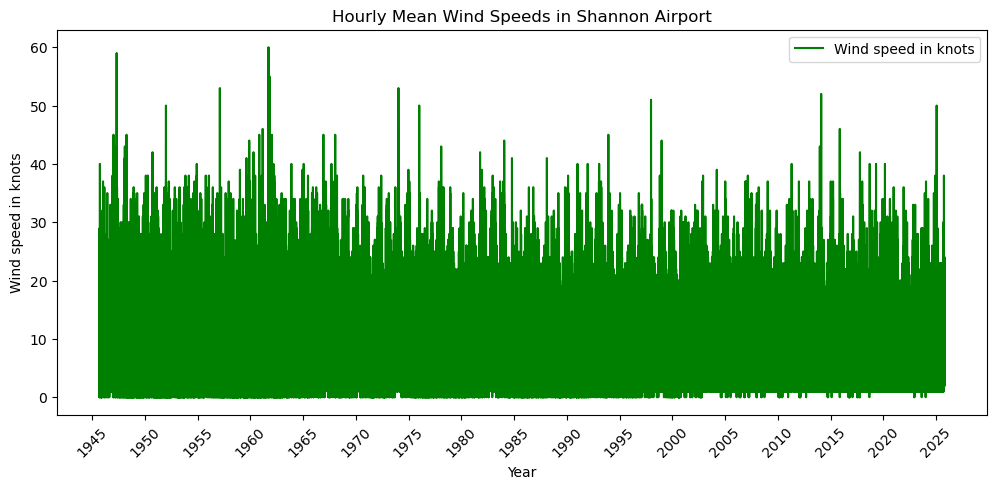

<Figure size 640x480 with 0 Axes>

In [107]:
# Plotting
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(hourly_wdsp, label='Wind speed in knots', color='green')
plt.xlabel('Year')
plt.ylabel('Wind speed in knots')
# Set ticks to be just the years, every 5 years
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
plt.xticks(ticks, ticks.strftime('%Y'), rotation=45)
plt.title('Hourly Mean Wind Speeds in Shannon Airport')
plt.legend()
plt.show()
plt.savefig('hourly_wdsp_shannon.png')

### Daily Mean Wind Speed

To find the daily mean, instead of hourly mean, windspeeds I used the `df.resample()` method. 

In [109]:
daily_wdsp = df['wdsp'].resample("D").mean()

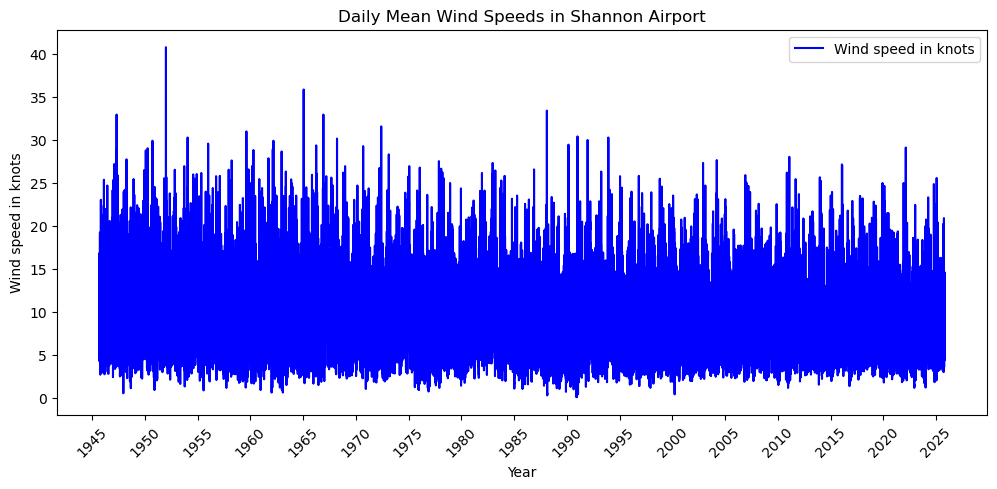

<Figure size 640x480 with 0 Axes>

In [104]:
# Plotting
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(daily_wdsp, label='Wind speed in knots', color='blue')
plt.xlabel('Year')
plt.ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
plt.xticks(ticks, ticks.strftime('%Y'), rotation=45)
plt.title('Daily Mean Wind Speeds in Shannon Airport')
plt.legend()
plt.show()
plt.savefig('daily_wdsp_shannon.png')

### Monthly Mean Wind Speed

In [108]:
monthly_wdsp = df['wdsp'].resample("MS").mean()

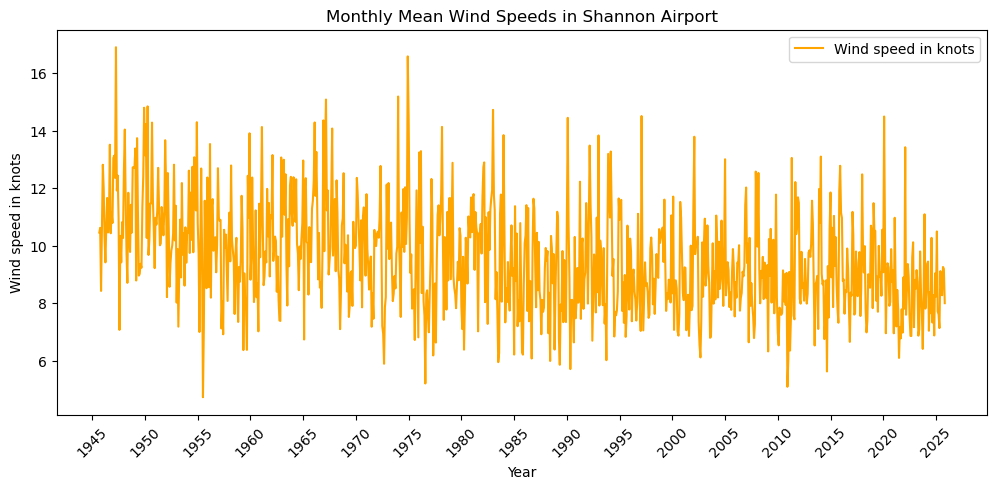

<Figure size 640x480 with 0 Axes>

In [115]:
# Plotting
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(monthly_wdsp, label='Wind speed in knots', color='orange')
plt.xlabel('Year')
plt.ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
plt.xticks(ticks, ticks.strftime('%Y'), rotation=45)
plt.title('Monthly Mean Wind Speeds in Shannon Airport')
plt.legend()
plt.show()
plt.savefig('monthly_wdsp_shannon.png')

### Yearly Mean Wind Speed

In [111]:
yearly_wdsp = df['wdsp'].resample("YS").mean()

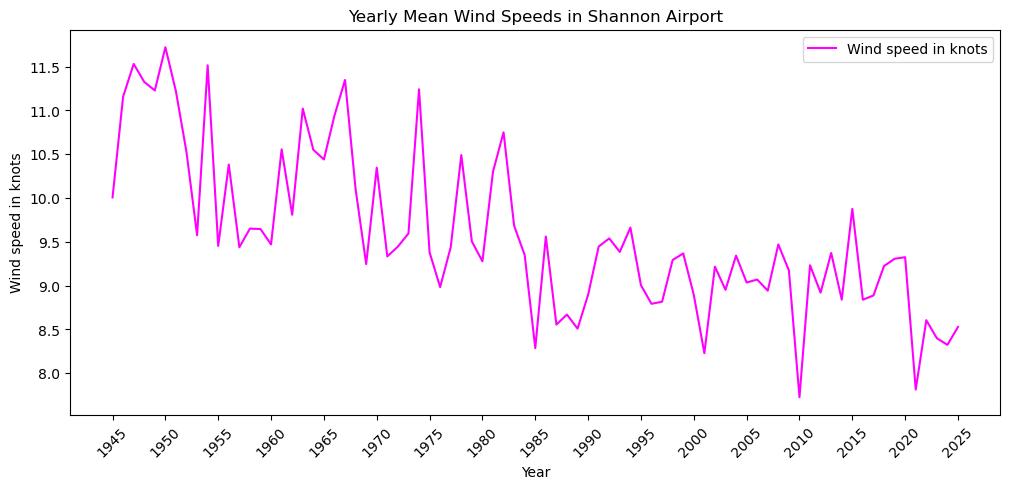

<Figure size 640x480 with 0 Axes>

In [118]:
# Plotting
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(yearly_wdsp, label='Wind speed in knots', color='magenta')
plt.xlabel('Year')
plt.ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
plt.xticks(ticks, ticks.strftime('%Y'), rotation=45)
plt.title('Yearly Mean Wind Speeds in Shannon Airport')
plt.legend()
plt.show()
plt.savefig('yearly_wdsp_shannon.png')

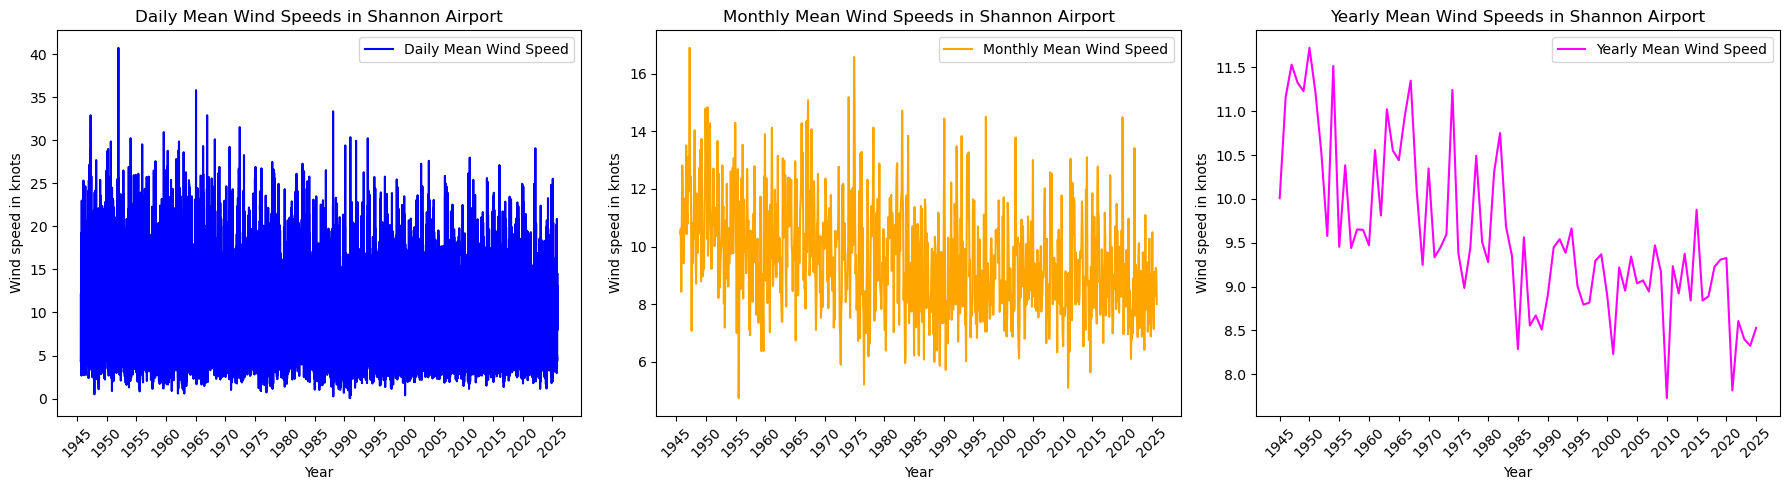

<Figure size 640x480 with 0 Axes>

In [121]:
# Multiple plots on one figure to show mean wind speeds at different time scales
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

# Plot daily mean wind speed
ax1.plot(daily_wdsp, label='Daily Mean Wind Speed', color='blue')
ax1.set_title('Daily Mean Wind Speeds in Shannon Airport')
ax1.set_xlabel('Year')
ax1.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax1.set_xticks(ticks)
ax1.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax1.legend()

# Plot monthly mean wind speed
ax2.plot(monthly_wdsp, label='Monthly Mean Wind Speed', color='orange')
ax2.set_title('Monthly Mean Wind Speeds in Shannon Airport')
ax2.set_xlabel('Year')
ax2.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax2.set_xticks(ticks)
ax2.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax2.legend()

# Plot yearly mean wind speed
ax3.plot(yearly_wdsp, label='Yearly Mean Wind Speed', color='magenta')
ax3.set_title('Yearly Mean Wind Speeds in Shannon Airport')
ax3.set_xlabel('Year')
ax3.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax3.set_xticks(ticks)
ax3.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax3.legend()
plt.tight_layout()
plt.show()
plt.savefig('mean_wdsp_shannon_daily_monthly_yearly.png')

## Max Wind Speed

In [122]:
daily_max_wdsp = df['wdsp'].resample("D").max()
monthly_max_wdsp = df['wdsp'].resample("MS").max()
yearly_max_wdsp = df['wdsp'].resample("YS").max()

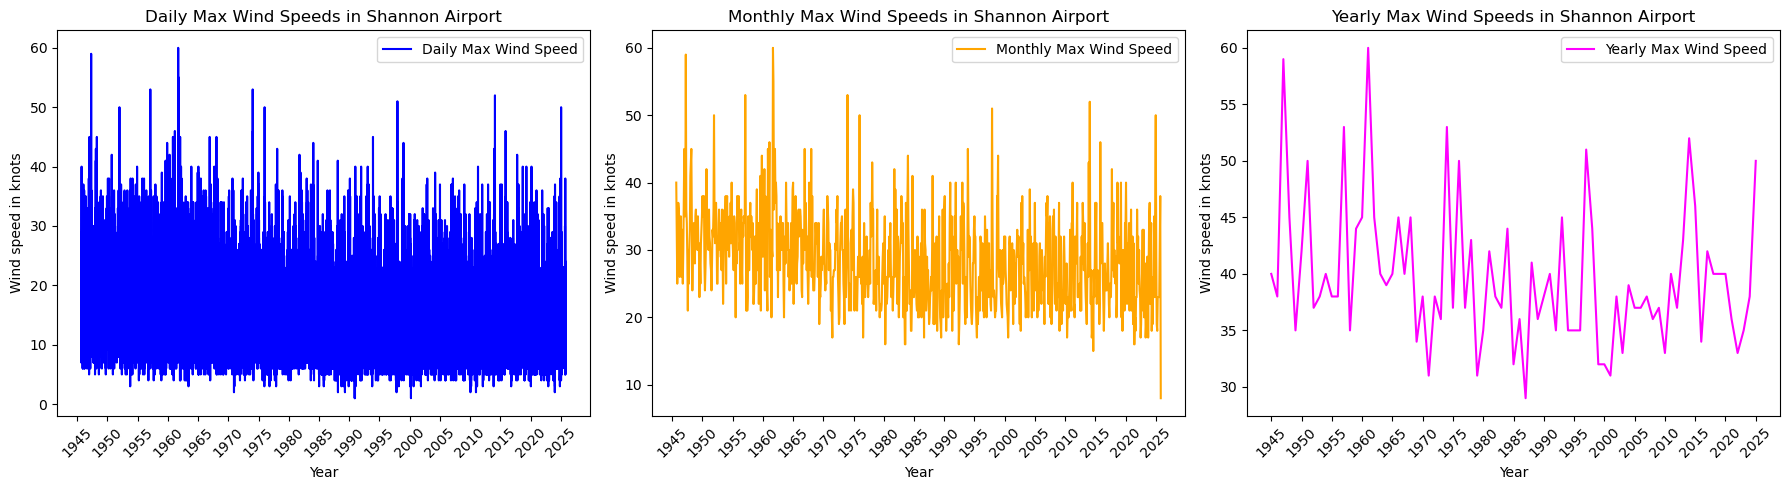

<Figure size 640x480 with 0 Axes>

In [125]:
# Plot of daily, monthly and yearly maximum wind speeds
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18,5))

# Plot daily max wind speed
ax1.plot(daily_max_wdsp, label='Daily Max Wind Speed', color='blue')
ax1.set_title('Daily Max Wind Speeds in Shannon Airport')
ax1.set_xlabel('Year')
ax1.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax1.set_xticks(ticks)
ax1.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax1.legend()

# Plot monthly max wind speed
ax2.plot(monthly_max_wdsp, label='Monthly Max Wind Speed', color='orange')
ax2.set_title('Monthly Max Wind Speeds in Shannon Airport')
ax2.set_xlabel('Year')
ax2.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax2.set_xticks(ticks)
ax2.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax2.legend()

# Plot yearly max wind speed
ax3.plot(yearly_max_wdsp, label='Yearly Max Wind Speed', color='magenta')
ax3.set_title('Yearly Max Wind Speeds in Shannon Airport')
ax3.set_xlabel('Year')
ax3.set_ylabel('Wind speed in knots')
ticks = pd.date_range(start='1945', periods = 17, freq='5YS')
ax3.set_xticks(ticks)
ax3.set_xticklabels(ticks.strftime('%Y'), rotation=45)
ax3.legend()

plt.tight_layout()
plt.show()
plt.savefig('max_wdsp_shannon_daily_monthly_yearly.png')